### Stack Overflow Data를 사용한 연습

In [9]:
# 설치한 폰트 설정 저 파일 위치의 폰트들을 확인해서 긁어옴.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
%matplotlib inline

# Add every font at the specified location
font_dir = ['C:\\Chang_git\\python_basic\\fonts']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)
    
# Set font family globally
mpl.rcParams['font.family'] = 'LINE Seed Sans KR'
print(mpl.rcParams['font.family'])
mpl.rcParams['axes.unicode_minus'] = False

LINE Seed Sans KR
Dongle
Dongle
NanumGothic
Dongle
['LINE Seed Sans KR']


In [108]:
import seaborn as sns
sns.set_theme(style = 'white')
sns.set_context('paper')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (9,5)
mpl.rcParams['figure.facecolor'] = '#00000000'
plt.style.use('seaborn-white')# 주어진 style로 바꿔라.
# axes만 색상 변경하는 법
# plt.style.use("default") 로 변경해줘야 함(style이 먼저 적용되기 때문임.)
#mpl.rcParams["axes.facecolor"] = "white"

In [11]:
import pandas as pd
import numpy as np

In [12]:
survey_raw_df = pd.read_csv('C:/Chang_git/Data/survey_results_public.csv',index_col = 'ResponseId') # ResponseId를 index로 하여 csv파일을 가져온다.

### qname을 idnex로 받고,question을 value 로 받는 Series형태의 데이터를 schema_raw에 저장한다.

In [13]:
schema_raw = pd.read_csv('C:/Chang_git/Data/survey_results_schema.csv',index_col = 'qname')['question']

In [14]:
survey_raw_df.columns

Index(['MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'Country', 'Currency', 'CompTotal', 'CompFreq',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'OpSysProfessional use', 'OpSysPersonal use', 'VersionControlSystem',
       'VCInteraction', 'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStack

In [15]:
schema_raw.index

Index(['S0', 'MetaInfo', 'S1', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'S2', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'S3', 'Language', 'Database', 'Platform',
       'Webframe', 'MiscTech', 'ToolsTech', 'NEWCollabTools', 'OpSys',
       'VersionControlSystem', 'VCInteraction', 'VCHosting',
       'OfficeStackAsync', 'OfficeStackSync', 'Blockchain', 'S4', 'NEWSOSites',
       'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'S5', 'Age',
       'Gender', 'Trans', 'Sexuality', 'Ethnicity', 'Accessibility',
       'MentalHealth', 'S6', 'TBranch', 'ICorPM', 'WorkExp', 'Knowledge',
       'Frequency', 'TimeSearching', 'TimeAnswering', 'Onboarding',
       'ProfessionalTech', 'SOTeamsUsage', 'TrueFalse', 'S7', 'SurveyLength',
       'SurveyEase', 'Knowledge_1', 'Knowledge_2', 'Knowl

In [16]:
# 데이터의 전체 컬럼 중 CompTotal 이란 항목에 대한 질문이 궁금하면 아래와 같이 조회할 수 있다.
schema_raw['CompFreq']

'Is that compensation weekly, monthly, or yearly?'

In [17]:
# 해당 데이터는 78개의 column을 가진다.(큰 데이터구먼)
survey_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MainBranch                      73268 non-null  object 
 1   Employment                      71709 non-null  object 
 2   RemoteWork                      58958 non-null  object 
 3   CodingActivities                58899 non-null  object 
 4   EdLevel                         71571 non-null  object 
 5   LearnCode                       71580 non-null  object 
 6   LearnCodeOnline                 50685 non-null  object 
 7   LearnCodeCoursesCert            29389 non-null  object 
 8   YearsCode                       71331 non-null  object 
 9   YearsCodePro                    51833 non-null  object 
 10  DevType                         61302 non-null  object 
 11  OrgSize                         51039 non-null  object 
 12  PurchaseInfluence               

### 너무 큰 데이터를 표시하기 위한 방법
- 78개의 column은 너무 크기 때문에 한 화면에 안보이게 된다. 이를 위한 설정이 필요하다

In [18]:
pd.set_option('display.max_columns',78) # 조회해보면 이전과 다르게 다 보이더라
pd.set_option('display.max_rows',78)

- 매우 많은 column이 존재하는데 이 중 일부만 발췌하여 사용한다.

In [19]:
selected_columns = [
    #인구 통계
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    #프로그래밍 경험
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'LearnCodeCoursesCert',
    'ProfessionalTech',
    'SOAccount',
    #고용 관련 정보
    'Employment',
    'DevType',
    'WorkExp'
]

In [20]:
survey_df = survey_raw_df[selected_columns].copy()
#survey_df

In [21]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 71771 non-null  object 
 1   Age                     70946 non-null  object 
 2   Gender                  70853 non-null  object 
 3   EdLevel                 71571 non-null  object 
 4   YearsCode               71331 non-null  object 
 5   YearsCodePro            51833 non-null  object 
 6   LanguageHaveWorkedWith  70975 non-null  object 
 7   LanguageWantToWorkWith  67027 non-null  object 
 8   LearnCodeCoursesCert    29389 non-null  object 
 9   ProfessionalTech        34906 non-null  object 
 10  SOAccount               71572 non-null  object 
 11  Employment              71709 non-null  object 
 12  DevType                 61302 non-null  object 
 13  WorkExp                 36769 non-null  float64
dtypes: float64(1), object(13)
memory usage

In [22]:
survey_df['YearsCode'].value_counts() # 문자열 2개가 포함되어 있어서 불편한 점이 있다.

10                    5217
5                     5193
6                     4651
4                     4480
7                     4237
8                     4227
3                     4122
2                     3351
12                    2995
15                    2962
20                    2659
9                     2581
11                    1819
14                    1811
13                    1624
25                    1582
1                     1566
Less than 1 year      1413
16                    1406
30                    1330
22                    1176
18                    1150
17                    1080
40                     777
24                     752
35                     742
23                     644
19                     563
26                     489
27                     485
21                     483
28                     425
32                     371
38                     288
37                     277
34                     241
36                     236
3

In [23]:
# series 값을 받아서 nan값이 몇개 있는지 보여라.
def count_nan(column):
    print(column.isna().sum())

count_nan(survey_df['YearsCode'])

1937


- pandas.Series.replace(변경 전 값, 변경 후 값, inplcae = True) 를 사용하여 값을 원하는 것으로 바꿀 수 있다.
- replace를 사용하여 아까 불편했던 문자열 값을 숫자값으로 변경 후 타입도 변경해보는 예제

In [24]:
survey_df['YearsCode'].replace('Less than 1 year', 0 , inplace = True)
survey_df['YearsCode'].replace('More than 50 years', 51 , inplace = True)
survey_df['YearsCode']= survey_df['YearsCode'].astype('float64') # float로 바뀐것을 확인하기 위해 info를 확인해보면 된다.
survey_df['YearsCode'].value_counts() 

10.0    5217
5.0     5193
6.0     4651
4.0     4480
7.0     4237
8.0     4227
3.0     4122
2.0     3351
12.0    2995
15.0    2962
20.0    2659
9.0     2581
11.0    1819
14.0    1811
13.0    1624
25.0    1582
1.0     1566
0.0     1413
16.0    1406
30.0    1330
22.0    1176
18.0    1150
17.0    1080
40.0     777
24.0     752
35.0     742
23.0     644
19.0     563
26.0     489
27.0     485
21.0     483
28.0     425
32.0     371
38.0     288
37.0     277
34.0     241
36.0     236
33.0     229
42.0     216
29.0     208
51.0     172
31.0     170
45.0     167
39.0     159
41.0     143
43.0     115
44.0     104
50.0      68
46.0      57
47.0      42
48.0      41
49.0      35
Name: YearsCode, dtype: int64

In [25]:
count_nan(survey_df['YearsCodePro'])

21435


In [26]:
survey_df['YearsCodePro'].replace('Less than 1 year', 0 , inplace = True)
survey_df['YearsCodePro'].replace('More than 50 years', 51 , inplace = True)
survey_df['YearsCodePro']= survey_df['YearsCodePro'].astype('float64')
survey_df['YearsCodePro'].value_counts()

3.0     4261
5.0     4057
2.0     3945
4.0     3884
10.0    3333
6.0     3184
7.0     2760
8.0     2646
1.0     2644
0.0     1972
15.0    1822
12.0    1711
9.0     1583
20.0    1472
11.0    1369
14.0    1048
22.0     933
16.0     921
13.0     914
25.0     877
18.0     787
17.0     723
30.0     568
23.0     463
24.0     454
21.0     429
19.0     380
26.0     320
27.0     286
35.0     266
28.0     254
32.0     223
40.0     175
29.0     126
33.0     122
31.0     121
34.0     113
36.0     111
37.0     100
38.0      96
42.0      67
45.0      52
39.0      51
41.0      42
51.0      41
43.0      31
44.0      26
46.0      19
48.0      18
50.0      14
47.0      10
49.0       9
Name: YearsCodePro, dtype: int64

In [27]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 71771 non-null  object 
 1   Age                     70946 non-null  object 
 2   Gender                  70853 non-null  object 
 3   EdLevel                 71571 non-null  object 
 4   YearsCode               71331 non-null  float64
 5   YearsCodePro            51833 non-null  float64
 6   LanguageHaveWorkedWith  70975 non-null  object 
 7   LanguageWantToWorkWith  67027 non-null  object 
 8   LearnCodeCoursesCert    29389 non-null  object 
 9   ProfessionalTech        34906 non-null  object 
 10  SOAccount               71572 non-null  object 
 11  Employment              71709 non-null  object 
 12  DevType                 61302 non-null  object 
 13  WorkExp                 36769 non-null  float64
dtypes: float64(3), object(11)
memory usage

In [28]:
survey_df.describe() # 값의 분포를 확인하는 method 
# 범위마다 표현되는 값이 정수이다 보니 데이터 값이 정수 값을 갖는 것을 짐작해볼 수 있다.

,YearsCode,YearsCodePro,WorkExp
count,71331.000000,51833.000000,36769.000000
mean,12.251307,9.910270,10.242378
std,9.952419,8.712048,8.706850
min,0.000000,0.000000,0.000000
25%,5.000000,4.000000,4.000000
50%,9.000000,7.000000,8.000000
75%,16.000000,14.000000,15.000000
max,51.000000,51.000000,50.000000


- YearsCode, YearsCodePro 를 수치 자료형으로 바꿨다.
- 만약 이 값들을 수치로 변경하다 에러를 만나면 NaN으로 처리하고자 한다면 아래 함수를 사용하면 된다.
- pandas.to_numeric(해당되는열, errors = 'coerce')
1. errors = 'coerce' = 파싱하다 error가 발생하면 NaN으로 처리해라
2. errors = 'raise' = 에러가 발생된다.
3. errors = 'ignore' = 에러 발생시 input이 발생한다.(입력받나봄)

In [29]:
survey_df['Yearscode'] = pd.to_numeric(survey_df['YearsCode'], errors='coerce' )
survey_df['YearscodePro'] = pd.to_numeric(survey_df['YearsCodePro'], errors='coerce' )

In [30]:
# Gender는 둘 이상의 데이터를 선택할 수 있어서 아래처럼 목록이 많아졌다.
survey_df['Gender'].value_counts()

Man                                                                                   64607
Woman                                                                                  3399
Prefer not to say                                                                      1172
Non-binary, genderqueer, or gender non-conforming                                       704
Or, in your own words:                                                                  279
Man;Non-binary, genderqueer, or gender non-conforming                                   235
Man;Or, in your own words:                                                              171
Woman;Non-binary, genderqueer, or gender non-conforming                                 160
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              31
Man;Woman                                                                                24
Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conformi

- gender의 분류가 너무 많아서 ;이 들어가면 중복 선택이므로 ;이 없는 값들만 처리하고 나머지는 NaN처리해야한다.
1.  pandas.Series.str.contains(';', na = False ) = ; 가 포함되어 있는지 확인할 수 있는 메서드
    - na 를 지정해줌으로 써 ; 가 있는 애들은 True를 넣어라 라는 뜻이다. 포함하지 않는 값은 False 를 담아준다. 
      na 지정하지 않는다면 ;를 포함하면 NaN으로 초기화 된다.
2. pandas.DataFrame.where(condition, False이면 바꿀 값, inplace = True) = condition이 False인 애들을 대체하는 함수이다.


In [31]:
survey_df.where(~(survey_df['Gender'].str.contains(';',na = True)),np.nan,inplace=True) # ; 포함한다면 nan을 넣어라

In [32]:
survey_df['Gender'].value_counts()

Man                                                  64607
Woman                                                 3399
Prefer not to say                                     1172
Non-binary, genderqueer, or gender non-conforming      704
Or, in your own words:                                 279
Name: Gender, dtype: int64

In [33]:
schema_raw['Country']

'Where do you live? <span style="font-weight: bolder;">*</span>'

In [34]:
survey_df['Country'].unique()

array([nan, 'United Kingdom of Great Britain and Northern Ireland',
       'Israel', 'Germany', 'India', 'Netherlands', 'Croatia',
       'United States of America', 'Australia', 'Russian Federation',
       'Czech Republic', 'Austria', 'Serbia', 'Italy', 'Canada',
       'Ireland', 'Poland', 'Slovenia', 'Iraq', 'Sweden', 'Madagascar',
       'Norway', 'Taiwan', 'Hong Kong (S.A.R.)', 'Mexico', 'France',
       'Brazil', 'Lithuania', 'Uruguay', 'Denmark', 'Spain', 'Turkey',
       'South Africa', 'Ukraine', 'Finland', 'Romania', 'Portugal',
       'Singapore', 'Belgium', 'Chile', 'Bulgaria', 'Latvia',
       'Philippines', 'Greece', 'Belarus', 'Saudi Arabia', 'Kenya',
       'Switzerland', 'Iceland', 'Viet Nam', 'Thailand', 'China',
       'Montenegro', 'Slovakia', 'Japan', 'Luxembourg', 'Argentina',
       'Hungary', 'Tunisia', 'Bangladesh', 'Maldives',
       'Dominican Republic', 'Egypt', 'Jordan', 'Pakistan', 'Nepal',
       'Iran, Islamic Republic of...', 'Indonesia', 'Ecuador',
  

country에 대한 유일한 값의 개수를 확인한다 NaN값은 count에 포함하지 않는다.

In [37]:
survey_df['Country'].nunique()

180

In [38]:
df = survey_df['Country'].value_counts().head(15)

C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51025 (\N{HANGUL SYLLABLE EUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50669

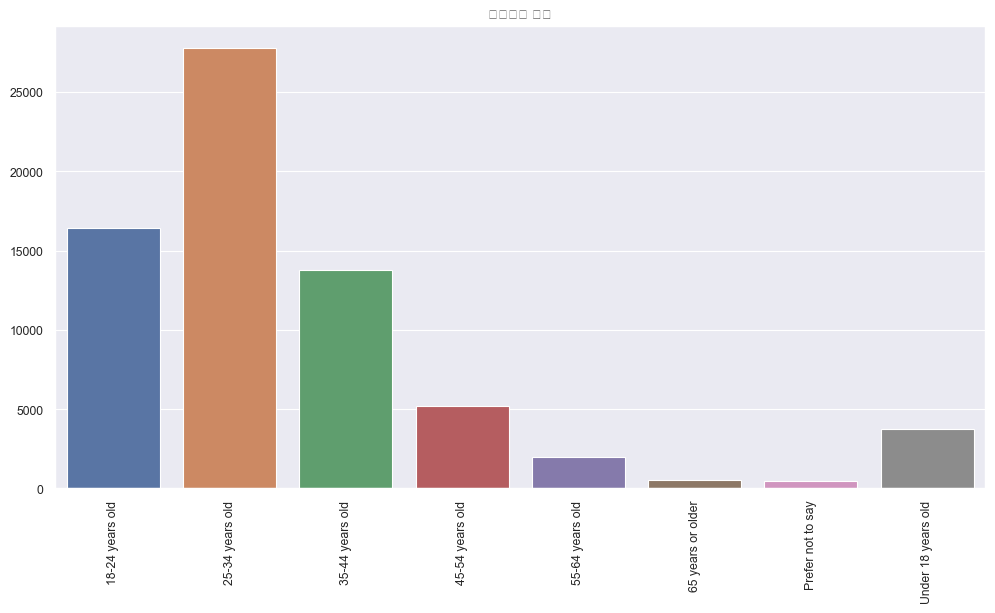

In [88]:
plt.figure(figsize = (12,6))
plt.title('응답자의 지역')
sns.barplot(x = df.index,y = df.values)
plt.ylabel = '응답자 수'
plt.xticks(rotation = 90)
plt.show()# data = ~~ 값을 안넣고 x.y만 넣었다는 경고에러 발생함.

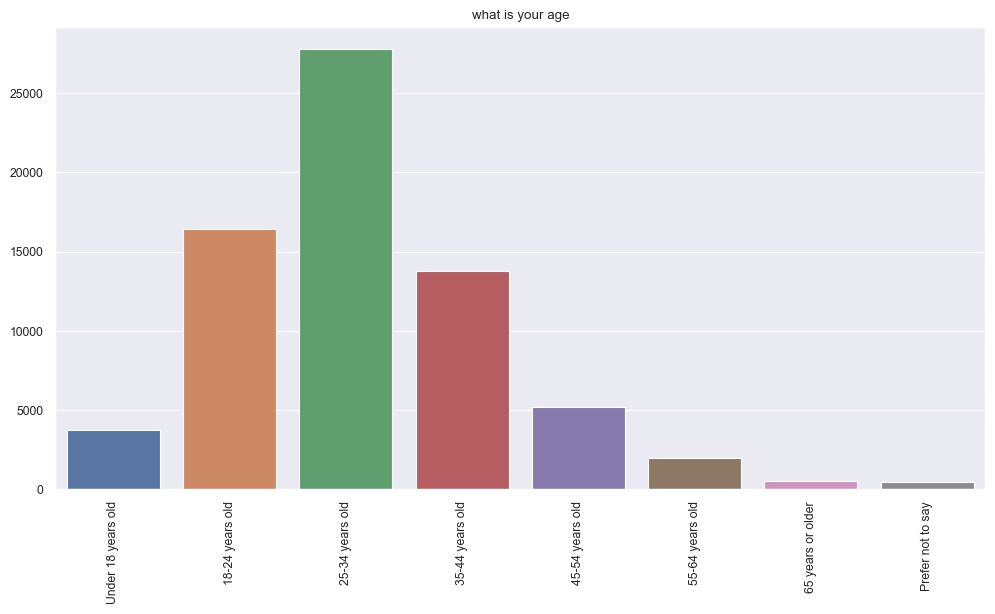

In [86]:
df= survey_df['Age'].value_counts().sort_index()
plt.figure(figsize = (12,6))
plt.title('what is your age')
plt.ylabel = '응답자 수'
idx = df.index
order = [idx[7],idx[0],idx[1],idx[2],idx[3],idx[4],idx[5],idx[6]] 
sns.barplot(x = df.index,y = df.values,order = order)
plt.xticks(rotation = 90)
plt.show()# data = ~~ 값을 안넣고 x.y만 넣었다는 경고에러 발생함.

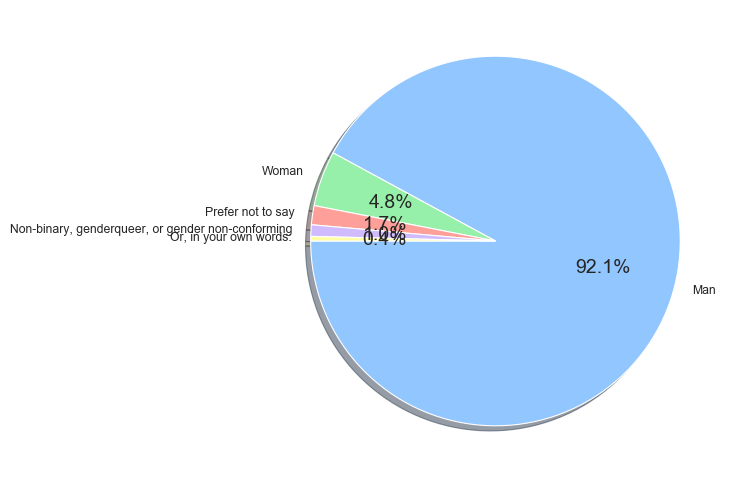

In [129]:
#plt.figure(figsize=(12,6)) # 그림 사이즈 키우는게 다임
gender = survey_df['Gender'].value_counts()
sizes = gender.values /gender.values.sum()*100
plt.pie(sizes,labels = gender.index,autopct='%1.1f%%', shadow=True, startangle=180)
plt.show()
# 대다수가 남성임을 알 수 있었다.

In [134]:
survey_df['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          29694
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15210
Some college/university study without earning a degree                                 9112
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7677
Associate degree (A.A., A.S., etc.)                                                    2208
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2111
Primary/elementary school                                                              1735
Something else                                                                         1182
Professional degree (JD, MD, etc.)                                                     1100
Name: EdLevel, dtype: int64

70029

In [ ]:

plt.ylabel = '응답자 수'
idx = df.index
order = [idx[7],idx[0],idx[1],idx[2],idx[3],idx[4],idx[5],idx[6]] 
sns.barplot(x = df.index,y = df.values,order = order)
plt.xticks(rotation = 90)
plt.show()# data = ~~ 값을 안넣고 x.y만 넣었다는 경고에러 발생함.

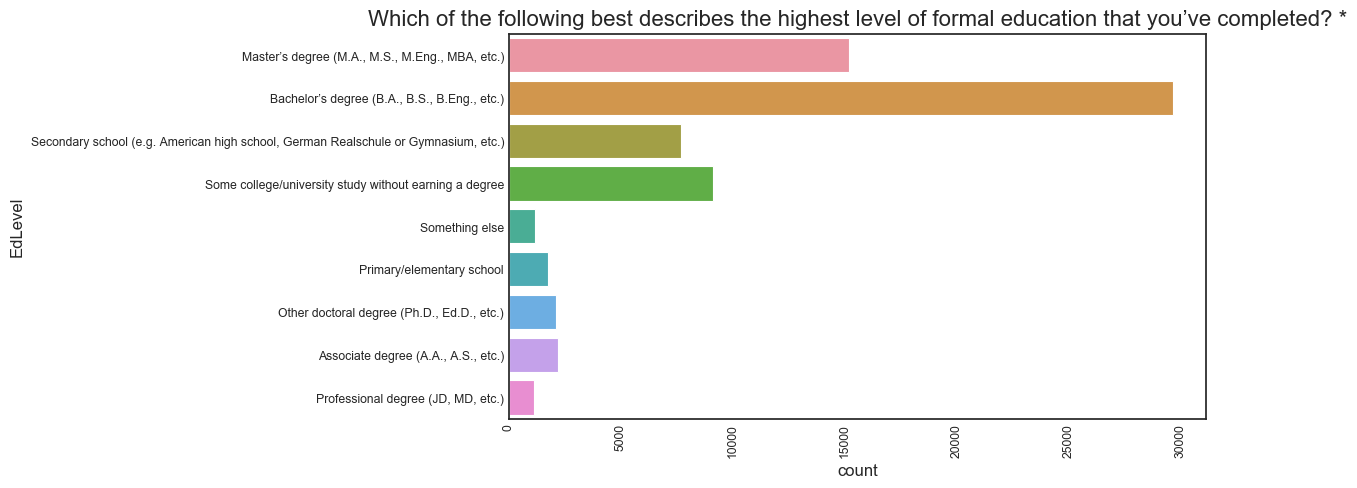

In [144]:
df= survey_df['EdLevel'].value_counts()
plt.title(schema_raw['EdLevel'])
plt.xticks(rotation = 90)
plt.xlabel = 'count'
sns.countplot(data = survey_df ,y = 'EdLevel')
plt.ylabel = None # None을 넣으면 label에 아무것도 안들어간다.
plt.show()


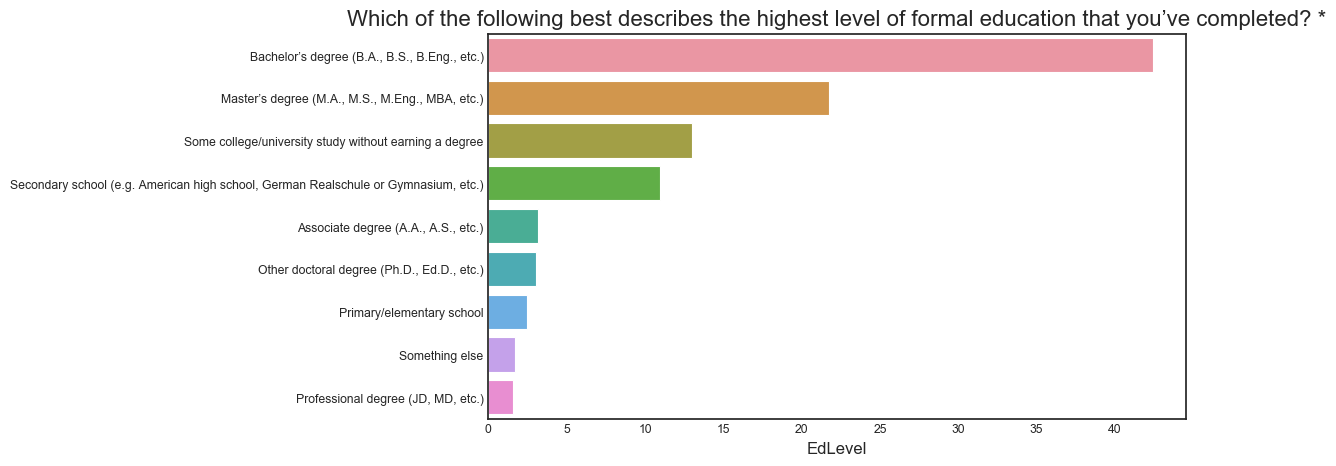

In [168]:
df= survey_df['EdLevel'].value_counts()
plt.title(schema_raw['EdLevel'])
plt.xlabel = 'Percentage'
plt.ylabel = None # None을 넣으면 label에 아무것도 안들어간다.
sns.barplot(x = df*100/survey_df['EdLevel'].count(),y = df.index)
plt.show()

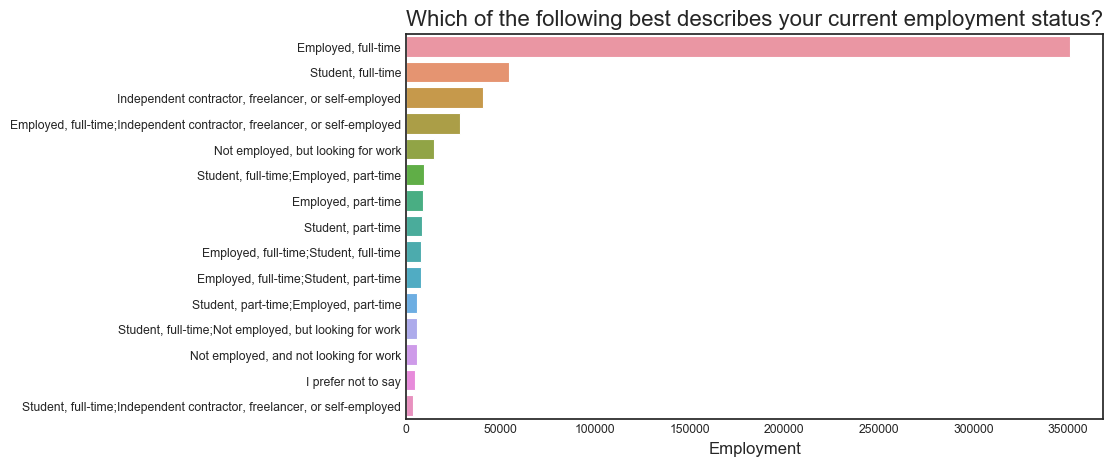

In [180]:
df = survey_df['Employment'].value_counts().head(15)
sns.barplot(x = df*100/survey_df['Employment'].head(15).count(),y = df.index)
plt.title(schema_raw['Employment'])
plt.xlabel = 'Percentage'
plt.ylabel = None # None을 넣으면 label에 아무것도 안들어간다.
plt.show()